You are given two m x n binary matrices grid1 and grid2 containing only 0's (representing water) and 1's (representing land). An island is a group of 1's connected 4-directionally (horizontal or vertical). Any cells outside of the grid are considered water cells.

An island in grid2 is considered a sub-island if there is an island in grid1 that contains all the cells that make up this island in grid2.

Return the number of islands in grid2 that are considered sub-islands.

 

Example 1:

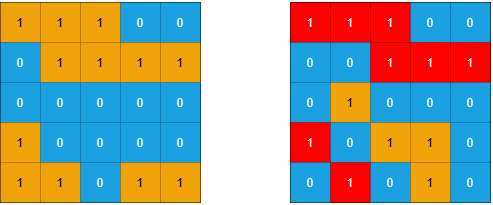

Input: grid1 = [[1,1,1,0,0],[0,1,1,1,1],[0,0,0,0,0],[1,0,0,0,0],[1,1,0,1,1]], grid2 = [[1,1,1,0,0],[0,0,1,1,1],[0,1,0,0,0],[1,0,1,1,0],[0,1,0,1,0]]
Output: 3
Explanation: In the picture above, the grid on the left is grid1 and the grid on the right is grid2.
The 1s colored red in grid2 are those considered to be part of a sub-island. There are three sub-islands.

Example 2:

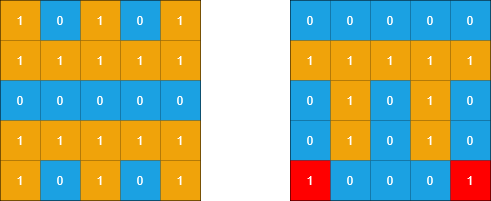

Input: grid1 = [[1,0,1,0,1],[1,1,1,1,1],[0,0,0,0,0],[1,1,1,1,1],[1,0,1,0,1]], grid2 = [[0,0,0,0,0],[1,1,1,1,1],[0,1,0,1,0],[0,1,0,1,0],[1,0,0,0,1]]
Output: 2 
Explanation: In the picture above, the grid on the left is grid1 and the grid on the right is grid2.
The 1s colored red in grid2 are those considered to be part of a sub-island. There are two sub-islands.

 

Constraints:

    m == grid1.length == grid2.length
    n == grid1[i].length == grid2[i].length
    1 <= m, n <= 500
    grid1[i][j] and grid2[i][j] are either 0 or 1.



In [ ]:
class Solution:
    def countSubIslands(self, grid1: List[List[int]], grid2: List[List[int]]) -> int:
        self.m = len(grid1)
        self.n = len(grid1[0])
        for i in range(self.m):
            for j in range(self.n):
                if grid2[i][j] == 1 and grid1[i][j] == 0:
                    self.remove_island(i, j, grid2)

        ans = 0
        for i in range(self.m):
            for j in range(self.n):
                if grid2[i][j] == 1:
                    ans += 1
                    self.remove_island(i, j, grid2)
        return ans

    def remove_island(self, x, y, grid):
        directions = [
            (-1, 0), (1, 0), (0, -1), (0, 1),
        ]
        q = deque([(x, y)])
        while q:
            x, y = q.popleft()
            grid[x][y] = 0
            for d in directions:
                x1 = x + d[0]
                y1 = y + d[1]
                if 0 <= x1 < self.m and 0 <= y1 < self.n and grid[x1][y1] == 1:
                    q.append((x1, y1))



In [ ]:
class Solution:
    def countSubIslands(self, grid1: List[List[int]], grid2: List[List[int]]) -> int:
        m = len(grid1)
        n = len(grid1[0])

        def remove_island(x, y):
            if not (0 <= x < m and 0 <= y < n) or grid2[x][y] == 0: 
                return
            grid2[x][y] = 0
            remove_island(x - 1, y)
            remove_island(x + 1, y)
            remove_island(x, y - 1)
            remove_island(x, y + 1)
    
        for i in range(m):
            for j in range(n):
                if grid2[i][j] == 1 and grid1[i][j] == 0:
                    remove_island(i, j)

        ans = 0
        for i in range(m):
            for j in range(n):
                if grid2[i][j] == 1:
                    ans += 1
                    remove_island(i, j)
        return ans